# Introdução aos Métodos Discretos

Nome: Yago Pereira dos Anjos Santos

## 1) Obtenha a diferença regressiva da derivada de $3^a$ ordem.

Utilizando a forma binomial, a diferença regressiva de terceira ordem é dada por $\displaystyle \nabla^{3}[f](x) = \sum\limits_{i = 0}^{3}(-1)^{i}\,\binom{3}{i}\,f(x - i\,h)$. Como $\displaystyle \binom{3}{i} = \frac{3!}{i!\,(3 - i)!}$ para cada $i$, segue que:
\begin{align*}
    \binom{3}{0} = \frac{3!}{0!\,(3 - 0)!} = 1, \binom{3}{1} = \frac{3!}{1!\,(3 - 1)!} = 3, \binom{3}{2} = \frac{3!}{2!\,(3 - 2)!} = 3, \binom{3}{3} = \frac{3!}{3!(3 - 3)!} = 1.
\end{align*}
Desta forma, obtemos o seguinte:
\begin{align*}
    \nabla^{3}[f](x) &= \sum\limits_{i = 0}^{3}(-1)^{i}\,\binom{3}{i}\,f(x - i\,h) = \binom{3}{0}\,f(x) -\binom{3}{1}\,f(x - h) + \binom{3}{2}\,f(x - 2\,h) - \binom{3}{3}\,f(x - 3\,h) \\
    &= f(x) - 3\,f(x - h) + 3\,f(x - 2\,h) - f(x - 3\,h).
\end{align*}
Portanto, $\nabla^{3}[f](x) = f(x) - 3\,f(x - h) + 3\,f(x - 2\,h) - f(x - 3\,h)$ é a diferença progressiva da derivada de 3ª ordem. Com essa diferença regressiva a derivada de 3ª ordem fica da seguinte forma:
$$ \frac{d^{3}}{dx^{3}}f(x) \approx \frac{\nabla^{3}[f](x)}{h^{3}} = \frac{f(x) - 3\,f(x - h) + 3\,f(x - 2\,h) - f(x - 3\,h)}{h^{3}}. $$
Então, a implementação de uma função para a aproximada da derivada de terceira ordem num ponto $x$ pode ser feita da seguinte forma.

In [1]:
# Função para o cálculo da diferença regressiva
# Entradas: função f, ponto x no qual se deseja calcular a diferença e o passo h
def diff_reg_3(f, x, h):
    return (f(x) - 3*f(x - h) + 3*f(x - 2*h) - f(x - 3*h))


# Função para a aproximar a derivada de 3ª ordem no ponto x com diferença regressiva
# Entradas: função f, ponto x e passo h
def der_f(f, x, h):
    return diff_reg_3(f, x, h)/(h**3)

## 2) Seja a função $f(x,y) = exp(x+2y)$ aproxime $f_y(x,y)$ para $(x,y)\in[0,1]\times[0,1]$ utilizando $h_y=0.1$ utilizando uma aproximação $O(h^2)$. Plote o resultado da aproximação junto da solução analítica.

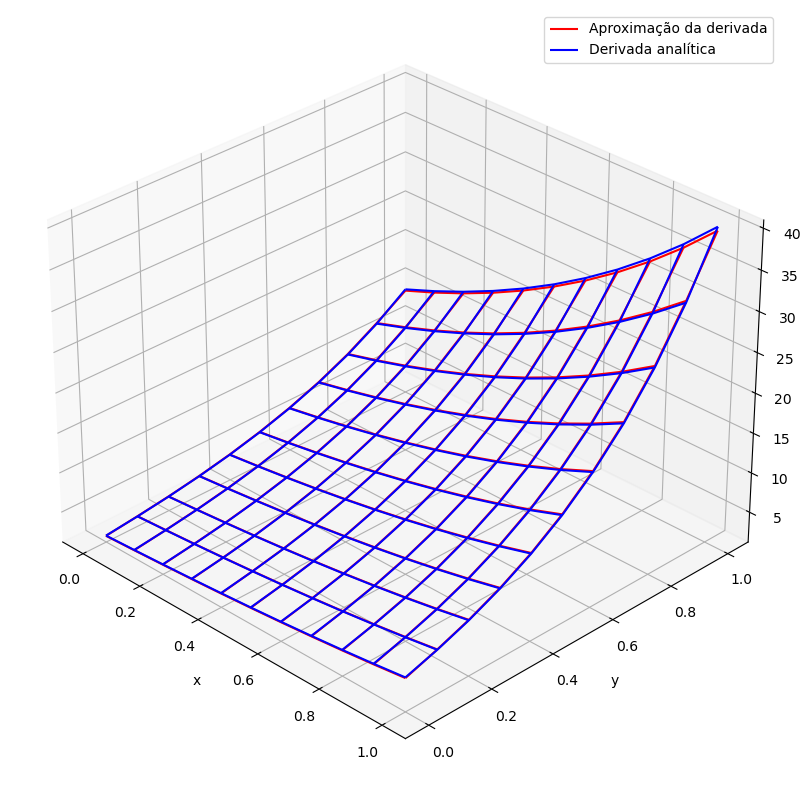

In [2]:
import numpy as np
import matplotlib.pyplot as plt


# Função f dada pelo problema
def f(x, y):
    return np.exp(x + 2*y)


# Derivada analítica da função f
def dfdy(x, y):
    return 2*np.exp(x + 2*y)


# Fórmula para a diferença unilateral à direita
def diff_uni_d(f, x, y, h):
    Df = (-f(x, y + 2*h) + 4*f(x, y + h) - 3*f(x, y))/(2*h)
    return Df


# Fórmula para diferença unilateral à esquerda
def diff_uni_e(f, x, y, h):
    Df = (3*f(x, y) - 4*f(x, y - h) + f(x, y - 2*h))/(2*h)
    return Df


# Fórmula para a diferença centrada
def diff_cent(f, x, y, h):
    Df = (f(x, y + h) - f(x, y - h))/(2*h)
    return Df


# Função para a aproximação da derivada da f por diferenças finitas
def diff(f, x, y, h):
    solucao = np.zeros((len(x), len(y)))

    indice = 0
    for v in y:
        if v == 0:
            solucao[indice] = np.array([diff_uni_d(f, u, v, h) for u in x])
        elif v == 1:
            solucao[indice] = np.array([diff_uni_e(f, u, v, h) for u in x])
        else:
            solucao[indice] = np.array([diff_cent(f, u, v, h) for u in x])
        indice += 1

    return solucao


h = 0.1
x_pontos = np.arange(0, 1 + h, h)
y_pontos = np.arange(0, 1 + h, h)
X, Y = np.meshgrid(x_pontos, y_pontos)

# Derivada analítica da f
fy = dfdy(X, Y)
# Aproximação para a derivada da f
diff = diff(f, x_pontos, y_pontos, h)

# Plotagem dos gráficos
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.plot_wireframe(X, Y, diff, color='r', label='Aproximação da derivada')
ax.plot_wireframe(X, Y, fy, color='b', label='Derivada analítica')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(30, -45)
plt.legend()
plt.show()